# DATDRD05-T07 - Introduction to modelling Final assignment- Hakim Shaibu 1641405

In [40]:
# Basic libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

# Statsmodels for regression and statistical analysis
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Model evaluation and formatting
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# Preprocessing and model selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV

# Machine learning models
from sklearn.linear_model import LinearRegression, Ridge

# Deep learning with TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Numerical operations
from numpy import mean, absolute


# Loading the data

In [41]:
df = pd.read_csv('1641405turnover.csv')

In [42]:
# Creating a copy of Original Dataframe to avoid modifying the Original data
df_copy = df.copy()
df_copy.head()

,Months_active,Distance_from_work,Age,Disciplined,Children,Social_drinker,Social_smoker,Pets,Weight,Height,BMI,Absent_hours
0,10,2.36,37,no,0,no,no,0,83,172,28,8
1,3,7.22,28,no,1,yes,no,4,80,172,27,8
2,12,5.82,40,no,1,yes,no,1,73,171,25,8
3,14,4.96,47,no,2,no,no,1,86,165,32,1
4,14,4.96,47,no,2,no,no,1,86,165,32,2


# Data Preperation 

In [43]:
#  Encoding objects datatype columns. 
df_dummies = pd.get_dummies(df_copy[['Social_drinker', 'Social_smoker', 'Disciplined']], drop_first=True).astype(int)

df_dummies.head()

,Social_drinker_yes,Social_smoker_yes,Disciplined_yes
0,0,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,0,0


### Replacing original columns with dummies 

In [44]:
df_dropped = df_copy.drop(['Social_drinker', 'Social_smoker', 'Disciplined'], axis=1)

# Concatenate the dummy columns back into the original DataFrame
df_cleaned = pd.concat([df_dropped, df_dummies], axis=1)

# Optional: check the updated DataFrame
df_cleaned.head()

,Months_active,Distance_from_work,Age,Children,Pets,Weight,Height,BMI,Absent_hours,Social_drinker_yes,Social_smoker_yes,Disciplined_yes
0,10,2.36,37,0,0,83,172,28,8,0,0,0
1,3,7.22,28,1,4,80,172,27,8,1,0,0
2,12,5.82,40,1,1,73,171,25,8,1,0,0
3,14,4.96,47,2,1,86,165,32,1,0,0,0
4,14,4.96,47,2,1,86,165,32,2,0,0,0


### Variable columns

In [45]:
# Target
Months_active = df_cleaned['Months_active']
# Features 
Distance_from_work = df_cleaned['Distance_from_work']
Age = df_cleaned['Age']
Children = df_cleaned['Children']
Pets = df_cleaned['Pets']
Weight = df_cleaned['Weight']
Height = df_cleaned['Height']
BMI = df_cleaned['BMI']
Absent_hours = df_cleaned['Absent_hours']
Social_drinker_yes = df_cleaned['Social_drinker_yes']
Social_smoker_yes = df_cleaned['Social_smoker_yes']
Disciplined_yes = df_cleaned['Disciplined_yes']

# Assignment 1 

                    Months_active  Distance_from_work       Age  Children
Months_active            1.000000           -0.381367  0.669429 -0.052922
Distance_from_work      -0.381367            1.000000 -0.254506  0.387894
Age                      0.669429           -0.254506  1.000000  0.055206
Children                -0.052922            0.387894  0.055206  1.000000


<Axes: >

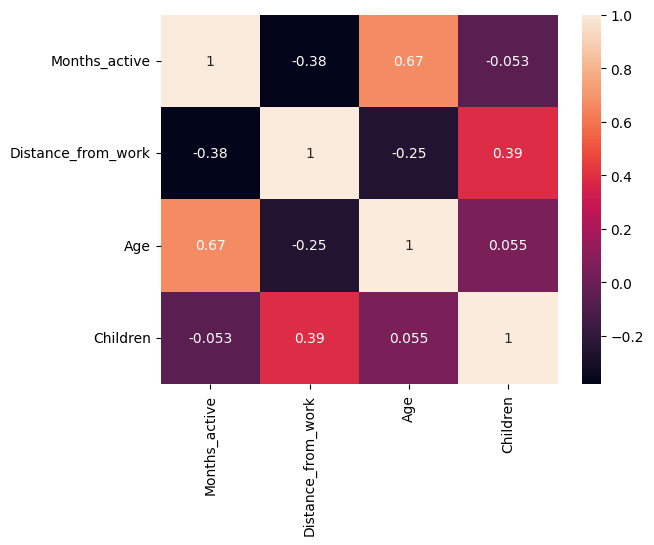

In [46]:
# Analysing the correlation between the variables Months_active, Distance_from_work, Age, and Children
# Correlation Heatmap
data = df_cleaned[['Months_active','Distance_from_work','Age','Children']]
matrix = data.corr()
print(matrix)
sns.heatmap(matrix, annot=True)

# Assignment 1.2

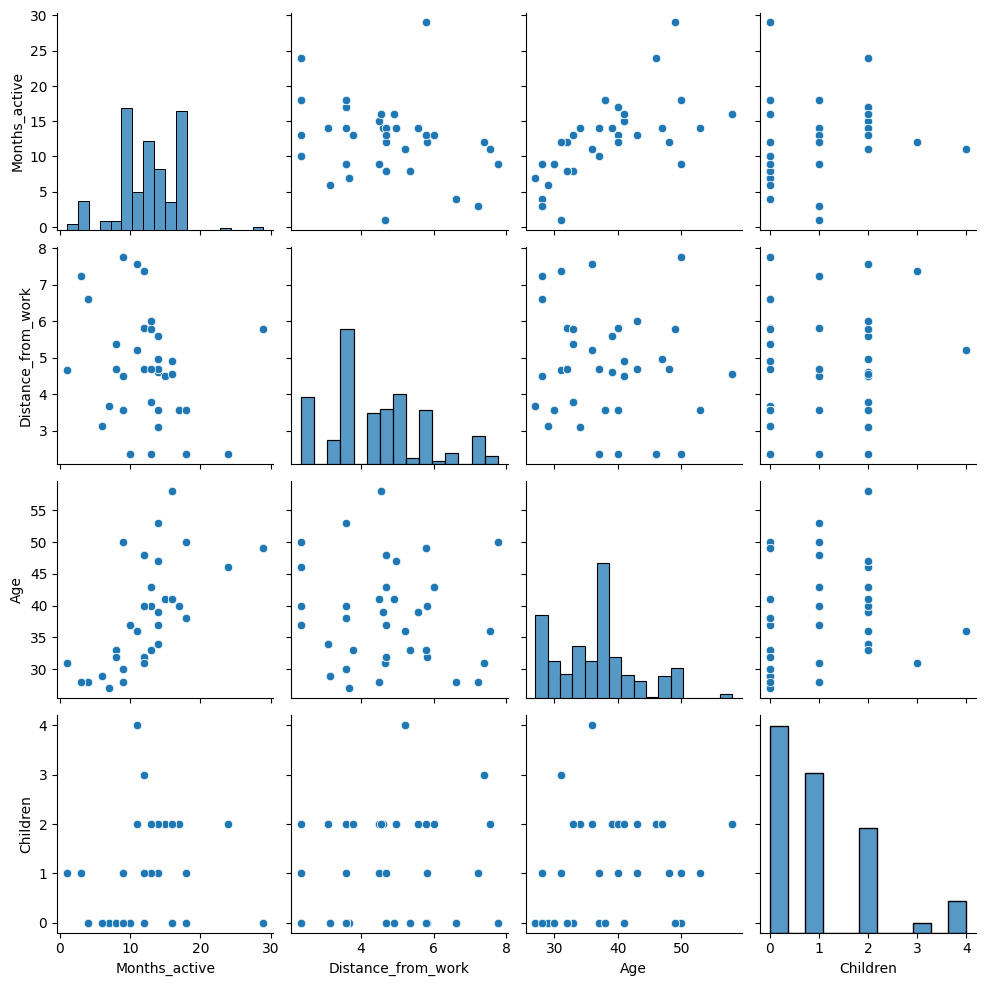

In [47]:
# Scatter matrix
sns.pairplot(df_cleaned[['Months_active', 'Distance_from_work', 'Age', 'Children']])

# Assignment 2.1

In [48]:
# dummy variables were created in data preparation 
df_dummies.head()

,Social_drinker_yes,Social_smoker_yes,Disciplined_yes
0,0,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [49]:
# replacing original columns with dummies to prevent redundancy
df_cleaned.head(5)

,Months_active,Distance_from_work,Age,Children,Pets,Weight,Height,BMI,Absent_hours,Social_drinker_yes,Social_smoker_yes,Disciplined_yes
0,10,2.36,37,0,0,83,172,28,8,0,0,0
1,3,7.22,28,1,4,80,172,27,8,1,0,0
2,12,5.82,40,1,1,73,171,25,8,1,0,0
3,14,4.96,47,2,1,86,165,32,1,0,0,0
4,14,4.96,47,2,1,86,165,32,2,0,0,0


In [50]:
model1 = smf.ols('Months_active ~ Distance_from_work + Age + Children + Pets + Weight + Height + BMI + Absent_hours + Disciplined_yes + Social_drinker_yes + Social_smoker_yes', data = df_cleaned).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     124.4
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          3.56e-152
Time:                        15:57:32   Log-Likelihood:                -1551.6
No. Observations:                 666   AIC:                             3127.
Df Residuals:                     654   BIC:                             3181.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             82.8105     14

# Assignment 2.2 

In [51]:
# check for multicollinearity (with the use of VIF using all variables)

X = df_cleaned[['Distance_from_work', 'Age', 'Children',
        'Pets', 'Weight', 'Height', 'BMI',
       'Absent_hours', 'Disciplined_yes',
        'Social_drinker_yes',
       'Social_smoker_yes']].dropna()  # select the relevant variables and delete missing values
X = add_constant(X)  # add a constant to the variables. VIF WON'T WORK CORRECTLY IF YOU DON'T DO THIS

# Create a dataframe that contains the VIF values
VIF_data = pd.DataFrame()  # create a pandas dataframe
VIF_data["variable"] = X.columns  # create a variable that simply lists the names of the variables you picked
VIF_data["VIF"] = [vif(X, i) for i in range(len(X.columns))]  # a loop that creates VIF values for each variable and then puts it in the VIF column

print(VIF_data)  # print the results

              variable           VIF
0                const  23500.576915
1   Distance_from_work      1.670810
2                  Age      1.647348
3             Children      1.340664
4                 Pets      1.327260
5               Weight    157.993184
6               Height     28.840492
7                  BMI    147.152792
8         Absent_hours      1.067724
9      Disciplined_yes      1.077221
10  Social_drinker_yes      1.378557
11   Social_smoker_yes      1.214746


In [52]:
# check for multicollinearity using VIF with all variables except  the ones with high VIF scores

X = df_cleaned[['Distance_from_work', 'Age', 'Children',
        'Pets','BMI',
       'Absent_hours', 'Disciplined_yes',
        'Social_drinker_yes',
       'Social_smoker_yes']].dropna()  
X = add_constant(X)  

# Create a dataframe that contains the VIF values
VIF_data = pd.DataFrame()  # create a pandas dataframe
VIF_data["variable"] = X.columns  # create a variable that simply lists the names of the variables you picked
VIF_data["VIF"] = [vif(X, i) for i in range(len(X.columns))] 

print(VIF_data) 

             variable        VIF
0               const  80.328522
1  Distance_from_work   1.550888
2                 Age   1.631910
3            Children   1.333588
4                Pets   1.298257
5                 BMI   1.632709
6        Absent_hours   1.048680
7     Disciplined_yes   1.072180
8  Social_drinker_yes   1.273370
9   Social_smoker_yes   1.174880


In [53]:
model2 = smf.ols('Months_active ~ Distance_from_work + Age + Children + Pets + BMI + Absent_hours + Disciplined_yes + Social_drinker_yes + Social_smoker_yes',data=df_cleaned).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     138.6
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.28e-145
Time:                        15:57:32   Log-Likelihood:                -1572.7
No. Observations:                 666   AIC:                             3165.
Df Residuals:                     656   BIC:                             3210.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.3150      0

# Assignment 2.3

In [54]:
Table = Stargazer([model1, model2])

HTML(Table.render_html())

# Assignment 3.2

In [55]:
scaler = StandardScaler()
df_standardized = df_cleaned.copy()
df_standardized[['Distance_from_work','Age','Children','Pets','BMI','Absent_hours']] = scaler.fit_transform(
    df_standardized[['Distance_from_work','Age','Children','Pets','BMI','Absent_hours']]
)
df_standardized.head()

,Months_active,Distance_from_work,Age,Children,Pets,Weight,Height,BMI,Absent_hours,Social_drinker_yes,Social_smoker_yes,Disciplined_yes
0,10,-1.521166,0.071376,-0.919726,-0.549416,83,172,0.283195,0.074101,0,0,0
1,3,2.068285,-1.322208,-0.021577,2.389628,80,172,0.052341,0.074101,1,0,0
2,12,1.034287,0.535904,-0.021577,0.185345,73,171,-0.409368,0.074101,1,0,0
3,14,0.399116,1.619803,0.876571,0.185345,86,165,1.206613,-0.439974,0,0,0
4,14,0.399116,1.619803,0.876571,0.185345,86,165,1.206613,-0.366535,0,0,0


In [56]:
model3 = smf.ols('Months_active ~ Distance_from_work + Age + Children + Pets + BMI + Absent_hours + Disciplined_yes + Social_drinker_yes + Social_smoker_yes',data=df_standardized).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     138.6
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.28e-145
Time:                        15:57:32   Log-Likelihood:                -1572.7
No. Observations:                 666   AIC:                             3165.
Df Residuals:                     656   BIC:                             3210.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.3057      0

# Assignment 4.1

In [57]:
# Prepare the data
df_standardized = df_standardized.dropna()  # remove missings
y = df_standardized['Months_active']  # select Target
X = df_standardized.drop('Months_active', axis=1)  # Select features



# Prediction with all features
# define the cross-validation
cv = RepeatedKFold(n_splits=5,  # splits the data into 5 folds
                   random_state=420)  # adding a number here ensures it will be the same each time

# predict with Linear regression
lm = LinearRegression()
lmscores = cross_val_score(lm, X, y,  # these define the type of model, features, and target
                           scoring='neg_mean_absolute_error',  # test using mean absolute deviation
                           cv=cv)  # this loads the cross validation we wrote above

lmMAE = mean(absolute(lmscores))  # Calculate the overall mean absolute error
print('the average prediction error with full data is: %.4f' % lmMAE)  # Print the result

the average prediction error with full data is: 2.0679


# Assignment 4.2

In [58]:
#  Ridge regression  with data normalization, using 5 folds and alpha=1

# preparing the data
columns = X.columns  # create index with column names (needed for last step)
scaler = MinMaxScaler()  # initiate the scaler
X = scaler.fit_transform(X)  # scale the data
X = pd.DataFrame(X, columns=columns)  # turn back into a dataframe

# Define the model and alpha
RidgeModel = Ridge(alpha=12)

# Run the cross-fold validation
scoresridge = cross_val_score(RidgeModel, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Print the average MAE
ridgeMAE = np.mean(np.abs(scoresridge))  # Calculate the overall mean absolute error
print('The average prediction error with ridge is: %.4f' % ridgeMAE)  # Print the result

The average prediction error with ridge is: 2.0401


#### Best alpha 

In [59]:
# Assignment 4.2: Ridge regression  using 5 folds for best alpha value 

# Preparing the data
columns = X.columns  # Save column names
scaler = MinMaxScaler()  # Initiate the scaler
X = scaler.fit_transform(X)  # Normalize the data
X = pd.DataFrame(X, columns=columns)  # Convert back to DataFrame

# Define alpha range for grid search
alpha_range = np.arange(start=1, stop=100, step=1)  # 1 to 99

# Define aspects of grid search
cv = RepeatedKFold(n_splits=5)
param = {'alpha':alpha_range}
RidgeModel = Ridge() 

# Set up the grid search for optimal alpha
RidgeM =    GridSearchCV(RidgeModel,
                        param_grid=param,
                        scoring = 'neg_mean_absolute_error',
                        cv=cv)
RidgeM.fit(X,y)
print("Best alpha: ", RidgeM.best_params_['alpha'])

Best alpha:  13


In [60]:
# Ridge regression  with best alpha

# preparing the data
columns = X.columns  # create index with column names (needed for last step)
scaler = MinMaxScaler()  # initiate the scaler
X = scaler.fit_transform(X)  # scale the data
X = pd.DataFrame(X, columns=columns)  # turn back into a dataframe

# Define the model and alpha
RidgeModel = Ridge(alpha=13)

# Run the cross-fold validation
scoresridge = cross_val_score(RidgeModel, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Print the average MAE
ridgeMAE = np.mean(np.abs(scoresridge))  # Calculate the overall mean absolute error
print('The average prediction error with ridge is: %.4f' % ridgeMAE)  # Print the result

The average prediction error with ridge is: 2.0451


# Assignment 4.3

In [61]:
# Define the neural network model
def create_baseline():
    # Create model
    nnmodel = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),  # Input Layer
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 1
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 2
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 3
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 4
        tf.keras.layers.Dense(512, activation='relu'),  # Hidden Layer 5
        tf.keras.layers.Dense(1)  # Output Layer
    ])
    
    # Compile model
    nnmodel.compile(loss='mean_absolute_error',  # Loss function: MAE
                    optimizer='adam',  # Optimizer: Adam
                    metrics=['mae'])  # Evaluate with MAE
    
    return nnmodel

# Define the estimator with updated hyperparameters
estimator = KerasRegressor(build_fn=create_baseline,  
                           epochs=100, batch_size=16,  # 100 epochs, batch size of 16
                           verbose=0)  # Suppress output text

# Define the k-fold function
kfold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)  # 5 splits, 1 repeat

# Generate the results
results = cross_val_score(estimator, X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Print the results
print('The average prediction error is: %.4f' % mean(absolute(results)))

C:\Users\hacky\AppData\Local\Temp\ipykernel_11636\910453320.py:22: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=create_baseline,


The average prediction error is: 0.4889
